In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# dataset from https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=2310023701

airfare_price = "Resources/airfares_per_city_quarterly.csv"

In [3]:
airfare_price = pd.read_csv(airfare_price)
airfare_price

,REF_DATE,GEO,DGUID,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1983-01,Canada,2016A000011124,Dollars,81,units,0,v812690,1,119.8,NaN,NaN,NaN,2
1,1983-01,Halifax,NaN,Dollars,81,units,0,v812700,2,115.8,NaN,NaN,NaN,2
2,1983-01,Montréal,NaN,Dollars,81,units,0,v812699,3,109.2,NaN,NaN,NaN,2
3,1983-01,Ottawa,NaN,Dollars,81,units,0,v812698,4,107.9,NaN,NaN,NaN,2
4,1983-01,Toronto,NaN,Dollars,81,units,0,v812697,5,137.7,NaN,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1601,2019-04,Saskatoon,NaN,Dollars,81,units,0,v812695,7,163.5,NaN,NaN,NaN,2
1602,2019-04,Regina,NaN,Dollars,81,units,0,v812694,8,168.9,NaN,NaN,NaN,2
1603,2019-04,Calgary,NaN,Dollars,81,units,0,v812693,9,162.5,NaN,NaN,NaN,2
1604,2019-04,Edmonton,NaN,Dollars,81,units,0,v812692,10,163.1,NaN,NaN,NaN,2


In [4]:
# split REF_DATE into Year and Quarter

airfare_price[["Year","Quarter"]] = airfare_price.REF_DATE.str.split("-", expand = True)

airfare_price_cleaned = airfare_price[["Year","Quarter","GEO","VALUE","UOM"]]

airfare_price_cleaned

,Year,Quarter,GEO,VALUE,UOM
0,1983,01,Canada,119.8,Dollars
1,1983,01,Halifax,115.8,Dollars
2,1983,01,Montréal,109.2,Dollars
3,1983,01,Ottawa,107.9,Dollars
4,1983,01,Toronto,137.7,Dollars
...,...,...,...,...,...
1601,2019,04,Saskatoon,163.5,Dollars
1602,2019,04,Regina,168.9,Dollars
1603,2019,04,Calgary,162.5,Dollars
1604,2019,04,Edmonton,163.1,Dollars


In [5]:
# rename columns names

airfare_price_cleaned = airfare_price_cleaned.rename(columns={"GEO":"City", "VALUE":"Avg Price", "UOM":"Currency"})

In [6]:
# Adjust quarter's values 

airfare_price_cleaned = airfare_price_cleaned.replace({"01":1 , "04":2 , "07":3 , "10":4})

In [7]:
# converting "Year" values from string to integer

airfare_price_cleaned["Year"] = airfare_price_cleaned["Year"].astype(int)

In [8]:
airfare_price_cleaned

,Year,Quarter,City,Avg Price,Currency
0,1983,1,Canada,119.8,Dollars
1,1983,1,Halifax,115.8,Dollars
2,1983,1,Montréal,109.2,Dollars
3,1983,1,Ottawa,107.9,Dollars
4,1983,1,Toronto,137.7,Dollars
...,...,...,...,...,...
1601,2019,2,Saskatoon,163.5,Dollars
1602,2019,2,Regina,168.9,Dollars
1603,2019,2,Calgary,162.5,Dollars
1604,2019,2,Edmonton,163.1,Dollars


In [9]:
# filtering the dataset only for the required cities and period range (2015 to 2019)

cities_filtered = airfare_price_cleaned.loc[(((airfare_price_cleaned["City"] == "Toronto") |\
                                             (airfare_price_cleaned["City"] == "Vancouver") |\
                                             (airfare_price_cleaned["City"] == "Montréal") |\
                                             (airfare_price_cleaned["City"] == "Halifax")) &\
                                             (airfare_price_cleaned["Year"] >= 2015)), :]


In [10]:
cities_filtered

,Year,Quarter,City,Avg Price,Currency
1409,2015,1,Halifax,192.1,Dollars
1410,2015,1,Montréal,176.3,Dollars
1412,2015,1,Toronto,215.1,Dollars
1418,2015,1,Vancouver,201.2,Dollars
1420,2015,2,Halifax,170.2,Dollars
...,...,...,...,...,...
1594,2019,1,Vancouver,190.0,Dollars
1596,2019,2,Halifax,167.9,Dollars
1597,2019,2,Montréal,175.6,Dollars
1599,2019,2,Toronto,203.2,Dollars


In [11]:
cities = ["Halifax", "Montréal", "Toronto", "Vancouver"]

In [12]:
city_airfares = []

In [13]:
# grouping data by City and Quarter

avg_airfare = cities_filtered.groupby(by=["City","Quarter"]).mean()

In [14]:
avg_airfare = avg_airfare["Avg Price"]

avg_airfare

City       Quarter
Halifax    1          164.460
           2          158.400
           3          172.075
           4          157.525
Montréal   1          165.840
           2          167.500
           3          161.200
           4          165.625
Toronto    1          198.720
           2          194.320
           3          192.450
           4          194.325
Vancouver  1          191.960
           2          191.720
           3          198.075
           4          189.625
Name: Avg Price, dtype: float64

In [15]:
avg_airfare_df = pd.DataFrame(avg_airfare)

avg_airfare_df

Avg Price
City      Quarter           
Halifax   1          164.460
          2          158.400
          3          172.075
          4          157.525
Montréal  1          165.840
          2          167.500
          3          161.200
          4          165.625
Toronto   1          198.720
          2          194.320
          3          192.450
          4          194.325
Vancouver 1          191.960
          2          191.720
          3          198.075
          4          189.625

In [16]:
dataframe = avg_airfare_df.reset_index()

dataframe = pd.DataFrame(dataframe)

In [17]:
df = dataframe.set_index("City")

In [18]:
df

,Quarter,Avg Price
City,,
Halifax,1,164.460
Halifax,2,158.400
Halifax,3,172.075
Halifax,4,157.525
Montréal,1,165.840
Montréal,2,167.500
Montréal,3,161.200
Montréal,4,165.625
Toronto,1,198.720


In [19]:
city_avg_price2 = []

In [20]:
for city in cities:
    test2 = dataframe.loc[dataframe["City"] == city, ["City","Quarter","Avg Price"]]
    city_avg_price2.append(test2)

In [21]:
# city_avg_price2

In [22]:
# quarters = [1, 2, 3, 4]

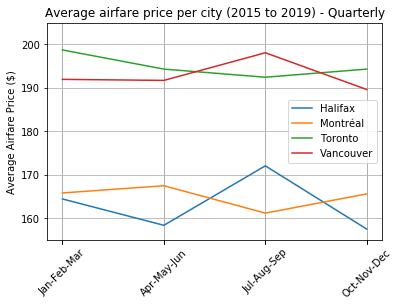

In [101]:
plt.plot(city_avg_price2[0]["Quarter"], city_avg_price2[0]["Avg Price"])

plt.plot(city_avg_price2[1]["Quarter"], city_avg_price2[1]["Avg Price"])

plt.plot(city_avg_price2[2]["Quarter"], city_avg_price2[2]["Avg Price"])

plt.plot(city_avg_price2[3]["Quarter"], city_avg_price2[3]["Avg Price"])

plt.title("Average airfare price per city (2015 to 2019) - Quarterly")
plt.xticks(df["Quarter"], ["Jan-Feb-Mar","Apr-May-Jun","Jul-Aug-Sep","Oct-Nov-Dec"], rotation=45)
# plt.xlabel("Year Quarter")
# plt.xlim(0.5, 4.5, 1)
plt.ylim(155, 205, 10)
plt.ylabel("Average Airfare Price ($)")
plt.legend(cities)
plt.grid()

plt.show()

In [24]:
# dataset imported from https://open.canada.ca/data/en/dataset/f87a464e-7d08-4f40-a4c7-d76ce8008fd8

airfare_group = "Resources/airfare_per_group.csv"

In [25]:
airfare_group_df = pd.read_csv(airfare_group)

airfare_group_df.head()

,REF_DATE,GEO,DGUID,Sector,Fare type group,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2007-01,Canada,2016A000011124,Domestic and international,All fare groups,Dollars,81,units,0,v53508617,1.1.1,238.0,NaN,NaN,NaN,2
1,2007-01,Canada,2016A000011124,Domestic and international,Business class,Dollars,81,units,0,v53508618,1.1.2,2398.3,E,NaN,t,2
2,2007-01,Canada,2016A000011124,Domestic and international,Economy,Dollars,81,units,0,v53508619,1.1.3,252.8,NaN,NaN,t,2
3,2007-01,Canada,2016A000011124,Domestic and international,Discounted,Dollars,81,units,0,v53508620,1.1.4,238.1,NaN,NaN,t,2
4,2007-01,Canada,2016A000011124,Domestic and international,Other fares,Dollars,81,units,0,v53508621,1.1.5,87.3,E,NaN,t,2


In [26]:
airfare_group_df[["Year","Quarter"]] = airfare_group_df.REF_DATE.str.split("-", expand = True)

airfare_group_cleaned = airfare_group_df[["Year","Quarter","Sector","Fare type group", "VALUE", "UOM"]]

airfare_group_cleaned

,Year,Quarter,Sector,Fare type group,VALUE,UOM
0,2007,01,Domestic and international,All fare groups,238.0,Dollars
1,2007,01,Domestic and international,Business class,2398.3,Dollars
2,2007,01,Domestic and international,Economy,252.8,Dollars
3,2007,01,Domestic and international,Discounted,238.1,Dollars
4,2007,01,Domestic and international,Other fares,87.3,Dollars
...,...,...,...,...,...,...
1205,2019,04,Domestic and international,All fare groups,239.3,Dollars
1206,2019,04,Domestic,All fare groups,176.6,Dollars
1207,2019,04,Short-haul,All fare groups,125.8,Dollars
1208,2019,04,Long-haul,All fare groups,224.5,Dollars


In [28]:
airfare_group_cleaned = airfare_group_cleaned.rename(columns={"Fare type group":"Fare Type", "VALUE":"Avg Price", "UOM":"Currency"})

airfare_group_cleaned

,Year,Quarter,Sector,Fare Type,Avg Price,Currency
0,2007,01,Domestic and international,All fare groups,238.0,Dollars
1,2007,01,Domestic and international,Business class,2398.3,Dollars
2,2007,01,Domestic and international,Economy,252.8,Dollars
3,2007,01,Domestic and international,Discounted,238.1,Dollars
4,2007,01,Domestic and international,Other fares,87.3,Dollars
...,...,...,...,...,...,...
1205,2019,04,Domestic and international,All fare groups,239.3,Dollars
1206,2019,04,Domestic,All fare groups,176.6,Dollars
1207,2019,04,Short-haul,All fare groups,125.8,Dollars
1208,2019,04,Long-haul,All fare groups,224.5,Dollars


In [29]:
airfare_group_cleaned = airfare_group_cleaned.replace({"01":1 , "04":2 , "07":3 , "10":4})

In [30]:
# converting "Year" values to integer

airfare_group_cleaned["Year"] = airfare_group_cleaned["Year"].astype(int)

In [31]:
airfare_group_cleaned["Sector"].value_counts()

Short-haul                    242
Domestic and international    242
Domestic                      242
Long-haul                     242
International                 242
Name: Sector, dtype: int64

In [32]:
airfare_group_cleaned["Fare Type"].value_counts()

All fare groups    250
Business class     240
Economy            240
Other fares        240
Discounted         240
Name: Fare Type, dtype: int64

In [34]:
# filtering the dataset only for the required cities and period range (2015 to 2019)

airfares_filtered = airfare_group_cleaned.loc[((airfare_group_cleaned["Sector"] == "Domestic") &\
                                               ((airfare_group_cleaned["Fare Type"] == "Discounted") |\
                                                (airfare_group_cleaned["Fare Type"] == "Other fares") |\
                                               (airfare_group_cleaned["Fare Type"] == "Economy")) &\
                                               (airfare_group_cleaned["Year"] >= 2015)), :]


airfares_filtered

,Year,Quarter,Sector,Fare Type,Avg Price,Currency
807,2015,1,Domestic,Economy,NaN,Dollars
808,2015,1,Domestic,Discounted,180.3,Dollars
809,2015,1,Domestic,Other fares,173.6,Dollars
832,2015,2,Domestic,Economy,272.0,Dollars
833,2015,2,Domestic,Discounted,172.5,Dollars
834,2015,2,Domestic,Other fares,164.5,Dollars
857,2015,3,Domestic,Economy,285.5,Dollars
858,2015,3,Domestic,Discounted,174.1,Dollars
859,2015,3,Domestic,Other fares,188.3,Dollars
882,2015,4,Domestic,Economy,279.0,Dollars


In [35]:
airfares_filtered["Fare Type"].value_counts()

Discounted     16
Economy        16
Other fares    16
Name: Fare Type, dtype: int64

In [36]:
airfares_valid = airfares_filtered.dropna(how="any")

airfares_valid

,Year,Quarter,Sector,Fare Type,Avg Price,Currency
808,2015,1,Domestic,Discounted,180.3,Dollars
809,2015,1,Domestic,Other fares,173.6,Dollars
832,2015,2,Domestic,Economy,272.0,Dollars
833,2015,2,Domestic,Discounted,172.5,Dollars
834,2015,2,Domestic,Other fares,164.5,Dollars
857,2015,3,Domestic,Economy,285.5,Dollars
858,2015,3,Domestic,Discounted,174.1,Dollars
859,2015,3,Domestic,Other fares,188.3,Dollars
882,2015,4,Domestic,Economy,279.0,Dollars
883,2015,4,Domestic,Discounted,172.5,Dollars


In [45]:
airfares_grouped = airfares_valid.groupby(by=["Quarter"]).mean()

In [46]:
airfares_grouped = airfares_grouped["Avg Price"]

In [47]:
dataframe2 = airfares_grouped.reset_index()

dataframe2 = pd.DataFrame(dataframe2)

In [50]:
df2 = dataframe2.set_index(["Quarter"])

In [51]:
df2

,Avg Price
Quarter,
1,183.880000
2,204.958333
3,208.954545
4,188.754545


In [99]:
average_line = ["average low fares"]
legend = cities + average_line

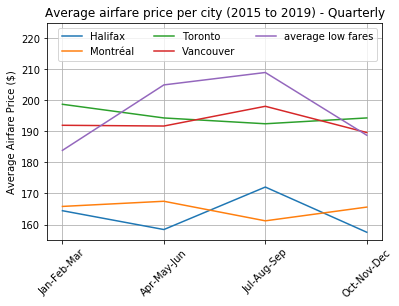

In [103]:
plt.plot(city_avg_price2[0]["Quarter"], city_avg_price2[0]["Avg Price"])

plt.plot(city_avg_price2[1]["Quarter"], city_avg_price2[1]["Avg Price"])

plt.plot(city_avg_price2[2]["Quarter"], city_avg_price2[2]["Avg Price"])

plt.plot(city_avg_price2[3]["Quarter"], city_avg_price2[3]["Avg Price"])

plt.plot(df2)

plt.title("Average airfare price per city (2015 to 2019) - Quarterly")
plt.xticks(df2.index, ["Jan-Feb-Mar","Apr-May-Jun","Jul-Aug-Sep","Oct-Nov-Dec"], rotation=45)
# plt.xlabel("Year Quarter")
# plt.xlim(0.5, 4.5, 1)
plt.ylim(155, 225, 10)
plt.ylabel("Average Airfare Price ($)")
plt.legend(legend, ncol=3)
plt.grid()

plt.show()